In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This dataset contains "Karenia brevis" data from Texas, Mississippi, Alabama, and Florida, 
# as well as data along the Florida Shelf in the Gulf of Mexico and 
# along the eastern coast of Florida in the North Atlantic Ocean.
# Karenia brevis is a harmful algae species

alge_growth = pd.read_csv('habsos_20220225.csv')
        
alge_growth.head(100)

<ipython-input-4-77f732092627>:6: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  alge_growth = pd.read_csv('habsos_20220225.csv')


,STATE_ID,DESCRIPTION,LATITUDE,LONGITUDE,SAMPLE_DATE,SAMPLE_DEPTH,GENUS,SPECIES,CATEGORY,CELLCOUNT,...,WATER_TEMP,WATER_TEMP_UNIT,WATER_TEMP_QA,WIND_DIR,WIND_DIR_UNIT,WIND_DIR_QA,WIND_SPEED,WIND_SPEED_UNIT,WIND_SPEED_QA,OBJECTID
0,AL,Orange Beach Waterfront,30.29480,-87.57510,11-JAN-22 05.23.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,12.1,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,939786
1,AL,Bear Point,30.30880,-87.52680,11-JAN-22 05.07.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,13.9,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,939785
2,AL,Alabama Point,30.27694,-87.54167,10-JAN-22 05.43.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,16.6,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,939778
3,AL,Florida Point A,30.26620,-87.55010,10-JAN-22 05.24.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,14.9,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,939775
4,AL,Cotton Bayou,30.26940,-87.58200,10-JAN-22 05.07.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,16.1,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,939780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,AL,Alabama Point,30.27694,-87.54167,01-SEP-21 04.38.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,29.8,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,679555
96,AL,Florida Point A,30.26620,-87.55010,01-SEP-21 04.24.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,28.5,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,679556
97,AL,Cotton Bayou,30.26940,-87.58200,01-SEP-21 03.58.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,29.6,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,679557
98,AL,Gulf State Park Pavilion,30.25472,-87.64333,01-SEP-21 03.35.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,29.3,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,679559


In [ ]:
# original data size
print(alge_growth.shape)

(190339, 25)


In [ ]:
#cleaning data

alge_growth_clean = alge_growth.drop(columns=['WIND_DIR', 'WIND_DIR_UNIT', 'WIND_DIR_QA', 'WIND_SPEED', 'WIND_SPEED_UNIT', 'WIND_SPEED_QA'])

# obtaining relavent information from database
alge_growth_clean = alge_growth_clean[alge_growth_clean['CELLCOUNT'] >= 10000] 

# convert SAMPLE_DATE to data and time format 
alge_growth_clean['SAMPLE_DATE'] = pd.to_datetime(alge_growth_clean['SAMPLE_DATE'], format='%d-%b-%y %I.%M.%S.%f000000 %p')
alge_growth_clean = alge_growth_clean[alge_growth_clean['SAMPLE_DATE'] >= '1953-01-01']
alge_growth_clean = alge_growth_clean[alge_growth_clean['SAMPLE_DATE'] <= '2022-12-31']

# q = alge_growth_clean['SAMPLE_DATE'].quantile(0.95)
# alge_growth_clean = alge_growth_clean[alge_growth_clean['SAMPLE_DATE'] <= q]


print(alge_growth_clean.info())
print(alge_growth_clean.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24025 entries, 72 to 190338
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATE_ID         24025 non-null  object        
 1   DESCRIPTION      24022 non-null  object        
 2   LATITUDE         24025 non-null  float64       
 3   LONGITUDE        24025 non-null  float64       
 4   SAMPLE_DATE      24025 non-null  datetime64[ns]
 5   SAMPLE_DEPTH     22880 non-null  float64       
 6   GENUS            24025 non-null  object        
 7   SPECIES          24025 non-null  object        
 8   CATEGORY         23821 non-null  object        
 9   CELLCOUNT        24025 non-null  int64         
 10  CELLCOUNT_UNIT   24025 non-null  object        
 11  CELLCOUNT_QA     24025 non-null  int64         
 12  SALINITY         9962 non-null   float64       
 13  SALINITY_UNIT    9962 non-null   object        
 14  SALINITY_QA      24025 non-null  int

In [ ]:
cellcount_and_date = alge_growth_clean[['CELLCOUNT', 'SAMPLE_DATE']]

cellcount_and_date.head(5)

cellcount_and_date.to_csv('cellcount_and_date.csv')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


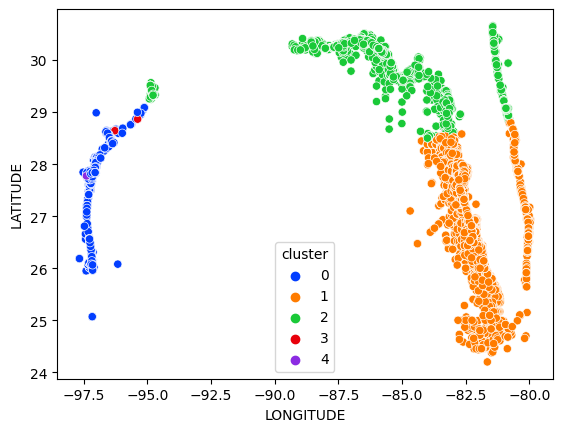

In [ ]:
from sklearn.cluster import KMeans

# select features for clustering
X = alge_growth_clean[['LATITUDE', 'LONGITUDE', 'CELLCOUNT']]

# scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# set the number of clusters
n_clusters = 5

# KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# fit the data to KMeans
kmeans.fit(X_scaled)

# add cluster labels to the dataset
alge_growth_clean['cluster'] = kmeans.labels_

# plot 
sns.scatterplot(data=alge_growth_clean, x='LONGITUDE', y='LATITUDE', hue='cluster', palette='bright')
plt.show()

In [ ]:
def train_pred_graph(cluster_num):
  # select the cluster you want to analyze
  cluster_num = cluster_num
  
  # filter the data to only include the selected cluster
  cluster_data = alge_growth_clean[alge_growth_clean['cluster'] == cluster_num]
  
  # select the features to use in the predictive model
  X = cluster_data[['LATITUDE', 'LONGITUDE', 'CELLCOUNT']]
  
  # select the target variable to predict
  y = cluster_data['CELLCOUNT']
  
  # split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
  reg = LinearRegression()
  reg.fit(X_train, y_train)
  
  # make predictions on the test set
  y_pred = reg.predict(X_test)
  
  # evaluate the model's performance
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  
  print("R^2 score:", r2)
  print("MSE:", mse)
  
  # use the trained model to predict future outcomes for the cluster
  future_data = pd.DataFrame({
      'LATITUDE': [cluster_data['LATITUDE'].mean()],
      'LONGITUDE': [cluster_data['LONGITUDE'].mean()],
      'CELLCOUNT': [cluster_data['CELLCOUNT'].mean()]
  })
  
  future_predictions = reg.predict(future_data)
  
  print("Future predictions:", future_predictions)
  
  # plot the predicted values
  fig, ax = plt.subplots()
  ax.scatter(cluster_data['LONGITUDE'], cluster_data['LATITUDE'], c=y, cmap='coolwarm')
  ax.scatter(future_data['LONGITUDE'], future_data['LATITUDE'], c='red', s=100)
  ax.set_xlabel('Longitude')
  ax.set_ylabel('Latitude')
  ax.set_title('Predicted Values for Cluster {}'.format(cluster_num))
  print("centriod: RED")
  plt.show()
  

R^2 score: 1.0
MSE: 1.2624787502522358e-18
Future predictions: [921897.60842627]
centriod: RED


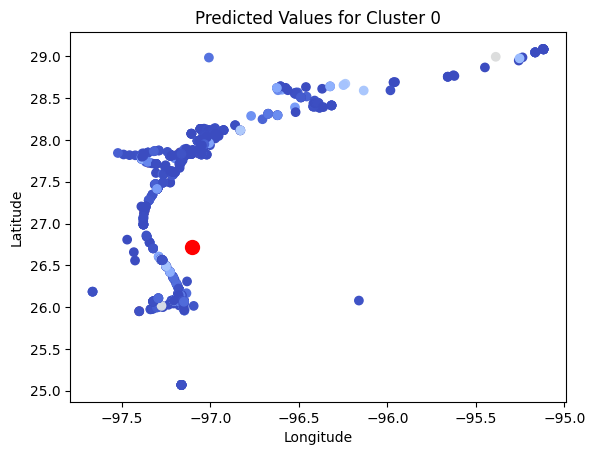

R^2 score: 1.0
MSE: 2.808058457022251e-19
Future predictions: [568016.92064134]
centriod: RED


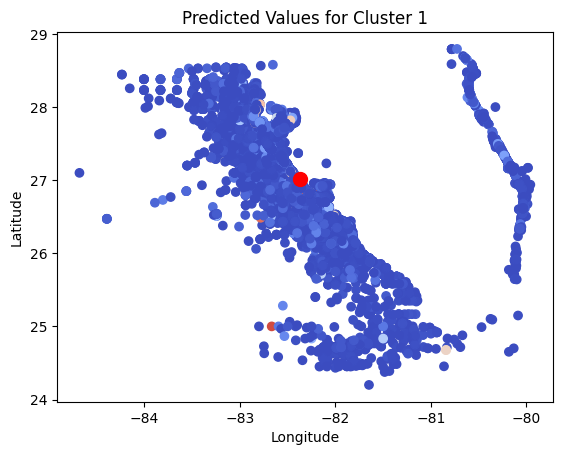

R^2 score: 1.0
MSE: 1.477503119812992e-19
Future predictions: [338467.46801486]
centriod: RED


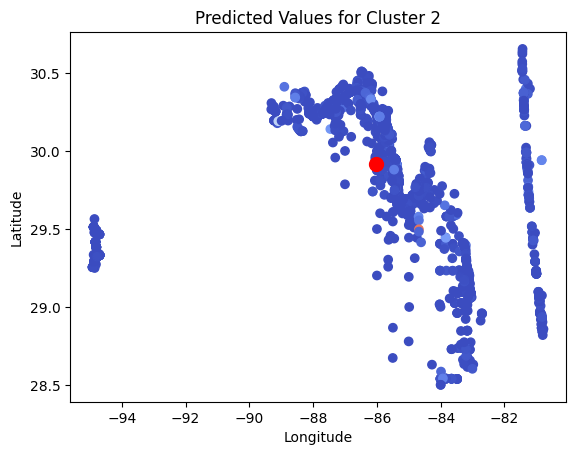

R^2 score: 1.0
MSE: 3.0642155479654322e-15
Future predictions: [1.3565229e+08]
centriod: RED


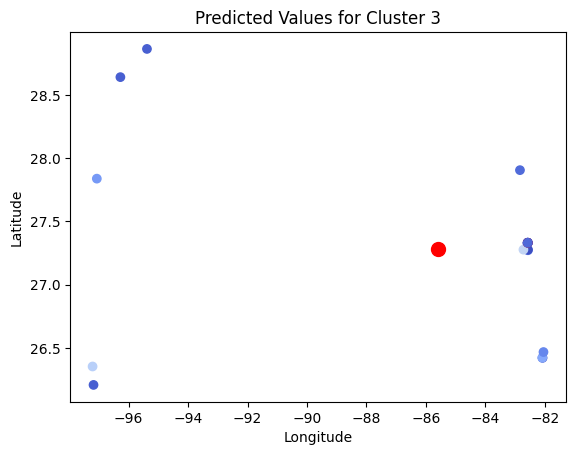

R^2 score: 1.0
MSE: 2.455300919844096e-17
Future predictions: [33614122.37628866]
centriod: RED


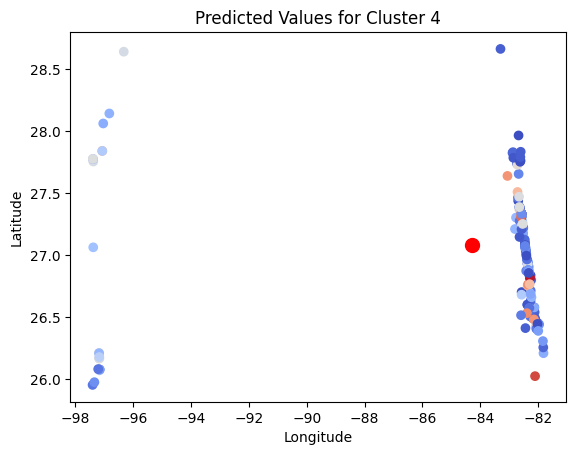

In [ ]:
clusters = [0, 1, 2, 3, 4]

for num in clusters:
  train_pred_graph(num)
